# Titanic: Machine Learning from Disaster

Dataset downloaded from https://www.kaggle.com/c/titanic/data, we asked to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc). Actually there are 2 datasets 

train data used to build machine learning predict classification model provide output label which is "Survived"; 0 = No, 1 = Yes, 891 total row entries

test data used to test how well your model performs on output label for 418 row entries

<strong>But,</strong> I only use train data for my Final Project Assignment, since test data only used for submission the competition at Kaggle page

### Variable Notes
- Pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

- Age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

- Sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

- Parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

- Ticket: ticket number

- Fare: Passenger fare

- Cabin: Cabin number

- Embarked: Port of Embarkation
C = Cherbourg 
Q = Queenstown 
S = Southampton



In [1]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from time import time

## Data Loading

In [2]:
train = pd.read_csv('./dataset/titanic/train.csv')
test = pd.read_csv('./dataset/titanic/test.csv')

In [3]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [5]:
print(train.info())
print('='*40)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

## Data Preparation

In [6]:
print(train.isna().sum())
print('='*20)
print(test.isna().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


There are missing values for "Age", "Fare", "Embarked" that we can handle next, for "Cabin" since only define number cabin number we can drop it, as well as "Ticket"

"Name" also can be drop since we can represented it by "PassengerId"

In [7]:
#dropping "Name", "Cabin", "Ticket"
train.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)
test.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

In [8]:
train.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S


In [9]:
test.head(3)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q


In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- there are infant passenger describe by age < 1, max passenger age is 80
- there are zero "Fare" maybe passenger who get ticket by gift, win prize, etc
- there are zero "Sibsp" and "Parch" it means passenger travel alone, we can generate new feature from this category

In [11]:
#generate new features
train["FamSize"] = train['SibSp'] + train['Parch']
train["Alone"] = np.where(train["FamSize"]==0,1,0)

test["FamSize"] = test['SibSp'] + test['Parch']
test["Alone"] = np.where(test["FamSize"]==0,1,0)

print(train.head())
print('='*20)
print(test.head())

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare  \
0            1         0       3    male  22.0      1      0   7.2500   
1            2         1       1  female  38.0      1      0  71.2833   
2            3         1       3  female  26.0      0      0   7.9250   
3            4         1       1  female  35.0      1      0  53.1000   
4            5         0       3    male  35.0      0      0   8.0500   

  Embarked  FamSize  Alone  
0        S        1      0  
1        C        1      0  
2        S        0      1  
3        S        1      0  
4        S        0      1  
   PassengerId  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  FamSize  \
0          892       3    male  34.5      0      0   7.8292        Q        0   
1          893       3  female  47.0      1      0   7.0000        S        1   
2          894       2    male  62.0      0      0   9.6875        Q        0   
3          895       3    male  27.0      0      0   8.6625    

since "S" is high frequent data on "Embarked, we can use to fill missing value with "S"

In [12]:
#handle missing value
train['Age'] = train['Age'].fillna(train['Age'].median()) #fill missing values "Age" with median values
test['Age'] = test['Age'].fillna(test['Age'].median())

train['Fare'] = train['Fare'].fillna(train['Fare'].median())  #fill missing values "Fare" with median values
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

train['Embarked'] = train['Embarked'].fillna('S') #fill missing values "Embarked" with S values
test['Embarked'] = test['Embarked'].fillna('S')

print(train.isna().sum())
print('='*20)
print(test.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
FamSize        0
Alone          0
dtype: int64
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
FamSize        0
Alone          0
dtype: int64


Handling missing values done

## Exploratory Data Analysis

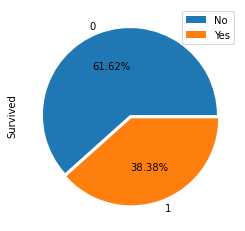

Precentage Survived passenger: 38.38383838383838
Total passenger: 891
Total survivor: 342


In [13]:
train["Survived"].value_counts().plot(kind='pie',explode=[0,.04],autopct='%1.2f%%')
plt.legend(['No','Yes'])

plt.show()

print("Precentage Survived passenger:", train['Survived'].sum()/len(train['Survived'])*100)
print("Total passenger:", len(train))
print('Total survivor:', train['Survived'].sum())

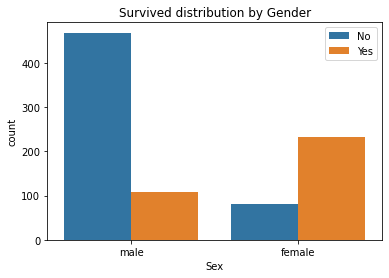

Survive data


,Sex,Survived,Percentage,Percentage from total passenger
0,female,233,68.128655,26.150393
1,male,109,31.871345,12.233446


In [14]:
sns.countplot("Sex", hue='Survived', data=train,)

plt.title("Survived distribution by Gender")
plt.legend(["No","Yes"],loc="best")
plt.show()

print('Survive data')
sex_sur = train[['Sex','Survived']].groupby(['Sex']).sum().reset_index()
sex_sur['Percentage'] = sex_sur['Survived']/sex_sur['Survived'].sum()*100
sex_sur['Percentage from total passenger'] = sex_sur['Survived']/len(train)*100
sex_sur.head()


"Sex" could be good predictor quite gap between male and female, maybe it cause by "common term" for "ladies and child first" when evacuation happen  :)

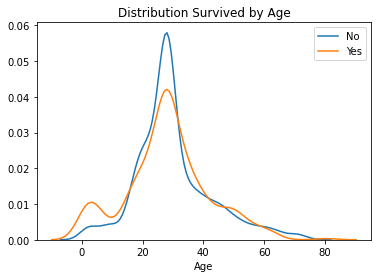

In [15]:
sns.kdeplot(train.Age[train.Survived==0])
sns.kdeplot(train.Age[train.Survived==1])
plt.legend(["No","Yes"])
plt.title('Distribution Survived by Age')
plt.xlabel('Age')
plt.show()

passenger age below 10 high chance being survived, as mentioned before "ladies and child first"

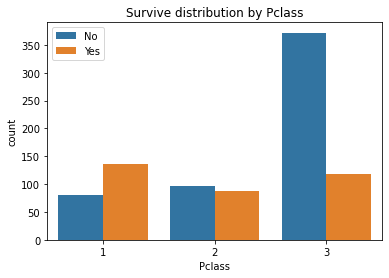

Survive data


,Pclass,Survived,Percentage,Percentage from total passenger
0,1,136,39.766082,15.263749
1,2,87,25.438596,9.764310
2,3,119,34.795322,13.355780


In [16]:
sns.countplot("Pclass", hue='Survived', data=train)

plt.title("Survive distribution by Pclass")
plt.legend(["No","Yes"],loc="best")
plt.show()

print('Survive data')
pclass_sur = train[['Pclass','Survived']].groupby(['Pclass']).sum().reset_index()
pclass_sur['Percentage'] = pclass_sur['Survived']/pclass_sur['Survived'].sum()*100
pclass_sur['Percentage from total passenger'] = pclass_sur['Survived']/len(train)*100
pclass_sur.head()


Highest class more chance being survived, lowest class more high passenger not survived

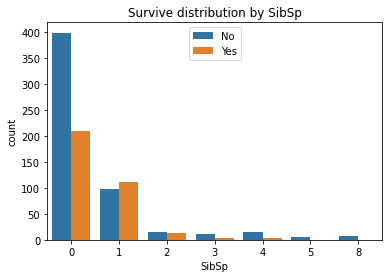

Survive data


,SibSp,Survived,Percentage,Percentage from total passenger
0,0,210,61.403509,23.569024
1,1,112,32.748538,12.570146
2,2,13,3.801170,1.459035
3,3,4,1.169591,0.448934
4,4,3,0.877193,0.336700


In [17]:
sns.countplot("SibSp", hue='Survived', data=train)

plt.title("Survive distribution by SibSp")
plt.legend(["No","Yes"],loc="top right")
plt.show()

print('Survive data')
sib_sur = train[['SibSp','Survived']].groupby(['SibSp']).sum().reset_index()
sib_sur['Percentage'] = sib_sur['Survived']/sib_sur['Survived'].sum()*100
sib_sur['Percentage from total passenger'] = sib_sur['Survived']/len(train)*100
sib_sur.head()

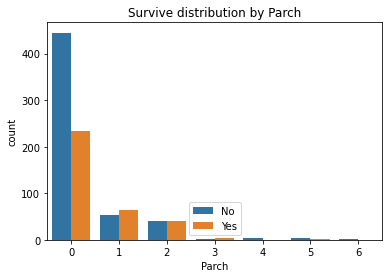

Survive data


,Parch,Survived,Percentage,Percentage from total passenger
0,0,233,68.128655,26.150393
1,1,65,19.005848,7.295174
2,2,40,11.695906,4.489338
3,3,3,0.877193,0.336700
4,4,0,0.000000,0.000000
5,5,1,0.292398,0.112233
6,6,0,0.000000,0.000000


In [18]:
sns.countplot("Parch", hue='Survived', data=train)

plt.title("Survive distribution by Parch")
plt.legend(["No","Yes"], loc="top right")
plt.show()

print('Survive data')
parch_sur = train[['Parch','Survived']].groupby(['Parch']).sum().reset_index()
parch_sur['Percentage'] = parch_sur['Survived']/parch_sur['Survived'].sum()*100
parch_sur['Percentage from total passenger'] = parch_sur['Survived']/len(train)*100

parch_sur

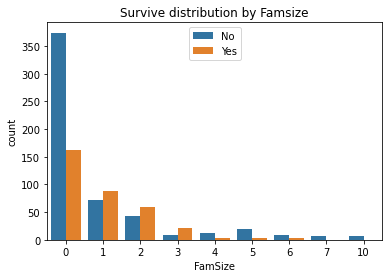

Survive data


,FamSize,Survived,Percentage,Percen from total passenger
0,0,163,47.660819,18.294052
1,1,89,26.023392,9.988777
2,2,59,17.251462,6.621773
3,3,21,6.140351,2.356902
4,4,3,0.877193,0.336700


In [19]:
sns.countplot("FamSize", hue='Survived', data=train)

plt.title("Survive distribution by Famsize")
plt.legend(["No","Yes"],loc="best")
plt.show()

print('Survive data')
fam_sur = train[['FamSize','Survived']].groupby(['FamSize']).sum().reset_index()
fam_sur['Percentage'] = fam_sur['Survived']/fam_sur['Survived'].sum()*100
fam_sur['Percen from total passenger'] = fam_sur['Survived']/len(train)*100

fam_sur.head()

"SibSp", "Parch", "FamSize" identically, Passenger who travel without family could be good predictor and we can only use "FamSize" as predictor, since it's generated from two others

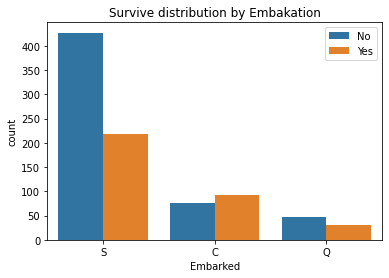

Survive data
  Embarked  Survived  Percentage  Percentage from total passenger
0        C        93   27.192982                        10.437710
1        Q        30    8.771930                         3.367003
2        S       219   64.035088                        24.579125
Total passenger groupby embarkation:
 S    646
C    168
Q     77
Name: Embarked, dtype: int64


In [20]:
sns.countplot("Embarked", hue='Survived', data=train)

plt.title("Survive distribution by Embakation")
plt.legend(["No","Yes"],loc="best")
plt.show()

print('Survive data')
emb_sur = train[['Embarked','Survived']].groupby(['Embarked']).sum().reset_index()
emb_sur['Percentage'] = emb_sur['Survived']/emb_sur['Survived'].sum()*100
emb_sur['Percentage from total passenger'] = emb_sur['Survived']/len(train)*100
embark = train['Embarked'].value_counts()

print(emb_sur)
print('Total passenger groupby embarkation:\n', embark)

it seem embarkation have little correlation with survived passenger, high number of not survive passenger from Southampton

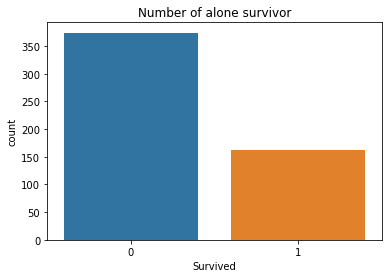

Total alone passenger: 537
total alone survivor: 163
Precentage Survived alone passenger: 30.353817504655495
Precentage Survived alone passenger from total passenger: 18.29405162738496


In [21]:
alone_sur = train[['Alone','Survived']]
alone_sur = alone_sur[alone_sur['Alone']==1]

sns.countplot(x="Survived", data=alone_sur)
plt.title('Number of alone survivor')
plt.show()

print("Total alone passenger:", len(alone_sur))
print('total alone survivor:', alone_sur['Survived'].sum())
print("Precentage Survived alone passenger:", alone_sur['Survived'].sum()/len(alone_sur['Survived'])*100)
print("Precentage Survived alone passenger from total passenger:", alone_sur['Survived'].sum()/len(train)*100)

Surprisingly being alone is not guaranteed being survivor, its only <strong>30%</strong> of alone passenger survived

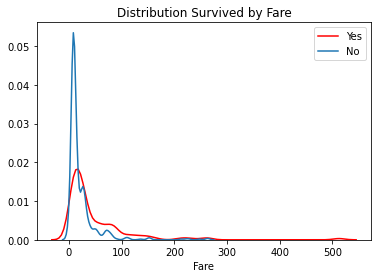

In [22]:
sns.kdeplot(train.Fare[train.Survived==1], color="r")
sns.kdeplot(train.Fare[train.Survived==0])
plt.legend(["Yes","No"])
plt.title('Distribution Survived by Fare')
plt.xlabel('Fare')
plt.show()

"Fare" distribution seem skewed and outlier detected, but if we look again, the highest "Fare" was survived passenger, may be it high class VVIP passenger who get first service to evacuated. Money talk here :)

## Data Preprocessing

In [23]:
#convert categorical features to Numerical label
train_features = train[['Pclass','Sex','Age','Fare','Embarked','FamSize','Alone']]
train_target = train['Survived']
test_features = test[['Pclass','Sex','Age','Fare','Embarked','FamSize','Alone']]

X_train_data = pd.get_dummies(train_features)
y_train_data = train_target

X_test_data = pd.get_dummies(test_features)

X_train_data.head()

,Pclass,Age,Fare,FamSize,Alone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,7.2500,1,0,0,1,0,0,1
1,1,38.0,71.2833,1,0,1,0,1,0,0
2,3,26.0,7.9250,0,1,1,0,0,0,1
3,1,35.0,53.1000,1,0,1,0,0,0,1
4,3,35.0,8.0500,0,1,0,1,0,0,1


In [24]:
X_test_data.head()

,Pclass,Age,Fare,FamSize,Alone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,7.8292,0,1,0,1,0,1,0
1,3,47.0,7.0000,1,0,1,0,0,0,1
2,2,62.0,9.6875,0,1,0,1,0,1,0
3,3,27.0,8.6625,0,1,0,1,0,0,1
4,3,22.0,12.2875,2,0,1,0,0,0,1


In [25]:
#due to test data is given to predict only (no label/target available), we split train data to validate our model, before we choose model that we use to predict test data
X_train, X_valid, y_train, y_valid = train_test_split(X_train_data, y_train_data, test_size=.3, stratify=y_train_data, random_state=42)
print("Training size:", X_train.shape[0])
print("Validation size:", X_valid.shape[0])


Training size: 623
Validation size: 268


## Modelling

In [26]:
#we try 5 model in default parameter
logreg = LogisticRegression()
bayes = GaussianNB()
knn = KNeighborsClassifier()
svm = SVC()
dtree = DecisionTreeClassifier()
random = RandomForestClassifier()


for mod in [logreg, bayes, knn, svm, dtree, random]:
    print (f'---{mod.__class__.__name__}---')
    start = time()
    mod.fit(X_train, y_train)
    end = time()
    print(f"Done training model in {end - start:.4f}s")

    start = time()
    pred = mod.predict(X_train)
    end = time()
    print(f"Done inferencing in {end - start:.4f}s")

    print("Prformance on training set:")
    print(classification_report(y_train,pred))
    print("Performance on validation set")
    print(classification_report(y_valid, mod.predict(X_valid)))
    print('='*30)


---LogisticRegression---
Done training model in 0.0514s
Done inferencing in 0.0030s
Prformance on training set:
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       384
           1       0.77      0.70      0.73       239

    accuracy                           0.80       623
   macro avg       0.80      0.79      0.79       623
weighted avg       0.80      0.80      0.80       623

Performance on validation set
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       165
           1       0.76      0.72      0.74       103

    accuracy                           0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268

---GaussianNB---
Done training model in 0.0050s
Done inferencing in 0.0020s
Prformance on training set:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83  

In [27]:
logreg_acc = logreg.score(X_valid,y_valid)
bayes_acc = bayes.score(X_valid,y_valid)
knn_acc = knn.score(X_valid,y_valid)
svc_acc = svm.score(X_valid,y_valid)
dtree_acc = dtree.score(X_valid,y_valid)
random_acc = random.score(X_valid,y_valid)

models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes','Decision Tree'],
    'Score': [svc_acc, knn_acc, logreg_acc, 
              random_acc, bayes_acc, dtree_acc]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Logistic Regression,0.802239
4,Naive Bayes,0.798507
3,Random Forest,0.794776
5,Decision Tree,0.757463
1,KNN,0.701493
0,Support Vector Machines,0.638060


<strong>Logistic Regression</strong> is the best model for this Titanic data prediction 

In [28]:
#try tuning Logistic Regresion
#standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_data)
X_test_scaled = scaler.fit_transform(X_test_data)

#train_test_split2
X_train2, X_valid2, y_train2, y_valid2 = train_test_split(X_train_scaled, y_train_data, test_size=.3, stratify=y_train_data, random_state=42)
print("Training size2:", X_train2.shape[0])
print("Validation size2:", X_valid2.shape[0])

#normalize
norm = MinMaxScaler()
X_train_norm = norm.fit_transform(X_train_data)
X_test_norm = norm.fit_transform(X_test_data)

#train_test_split3
X_train3, X_valid3, y_train3, y_valid3 = train_test_split(X_train_norm, y_train_data, test_size=.3, stratify=y_train_data, random_state=42)
print("Training size3:", X_train3.shape[0])
print("Validation size3:", X_valid3.shape[0])


Training size2: 623
Validation size2: 268
Training size3: 623
Validation size3: 268


In [29]:
print ('---LogisticRegression---')
start = time()
mdl = LogisticRegression(solver='liblinear',C=0.05, multi_class='ovr', random_state=111).fit(X_train2, y_train2)
end = time()
print(f"Done training model in {end - start:.4f}s")

start = time()
pred = mdl.predict(X_train2)
end = time()
print(f"Done inferencing in {end - start:.4f}s")

print("Prformance on training set:")
print(classification_report(y_train2,pred))
print("Performance on validation set")
print(classification_report(y_valid2, mdl.predict(X_valid2)))
print('='*30)

---LogisticRegression---
Done training model in 0.0020s
Done inferencing in 0.0010s
Prformance on training set:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       384
           1       0.74      0.69      0.72       239

    accuracy                           0.79       623
   macro avg       0.78      0.77      0.78       623
weighted avg       0.79      0.79      0.79       623

Performance on validation set
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       165
           1       0.74      0.73      0.74       103

    accuracy                           0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



In [30]:
print ('---LogisticRegression---')
start = time()
mdl = LogisticRegression(C=0.1).fit(X_train3, y_train3)
end = time()
print(f"Done training model in {end - start:.4f}s")

start = time()
pred = mdl.predict(X_train3)
end = time()
print(f"Done inferencing in {end - start:.4f}s")

print("Prformance on training set:")
print(classification_report(y_train3,pred))
print("Performance on validation set")
print(classification_report(y_valid3, mdl.predict(X_valid3)))
print('='*30)

---LogisticRegression---
Done training model in 0.0140s
Done inferencing in 0.0010s
Prformance on training set:
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       384
           1       0.75      0.68      0.71       239

    accuracy                           0.79       623
   macro avg       0.78      0.77      0.78       623
weighted avg       0.79      0.79      0.79       623

Performance on validation set
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       165
           1       0.72      0.69      0.71       103

    accuracy                           0.78       268
   macro avg       0.77      0.76      0.77       268
weighted avg       0.78      0.78      0.78       268



already try to standardize or normalize or changing parameter but the result is getting worse, the accuracy being decresed, So better we not use it, back to default data and parameter :)

In [31]:
model = LogisticRegression()

print('='*54)
print (f'------------------{model.__class__.__name__}------------------')
start = time()
model.fit(X_train, y_train)
end = time()
print(f"Done training model in {end - start:.4f}s")

start = time()
pred = model.predict(X_train)
end = time()
print(f"Done inferencing in {end - start:.4f}s")

print("Prformance on training set:")
print(classification_report(y_train,pred))
print("Performance on validation set")
print(classification_report(y_valid, model.predict(X_valid)))
print('='*54)

------------------LogisticRegression------------------
Done training model in 0.0618s
Done inferencing in 0.0022s
Prformance on training set:
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       384
           1       0.77      0.70      0.73       239

    accuracy                           0.80       623
   macro avg       0.80      0.79      0.79       623
weighted avg       0.80      0.80      0.80       623

Performance on validation set
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       165
           1       0.76      0.72      0.74       103

    accuracy                           0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



In [32]:
filename = "./models/LogRegression.joblib"
joblib.dump(model, filename)

['./models/LogRegression.joblib']

In [33]:
titanic_model = joblib.load("./models/LogRegression.joblib")

In [34]:
#for submission the competition
submission = pd.DataFrame({
    "Passenger Id": test['PassengerId'],
    "Survived": titanic_model.predict(X_test_data)
})
submission.head()

,Passenger Id,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


# =======END=======